# WEEK 5 - LAB EXERCISE

**Student Name:** Tran Thi Hong Phuong - **Student ID:** s3623386

# Introduction

In this lab, we will practise performing k-fold cross validation and use it to find the best regularisation parameter for a lasso polynomial regression model.

Starting this week, we will progressively provide less code, and would like you to use previous labs and what you know to perform the tasks. This will help you to become proficient at this.

# Datasets

In this lab, we will reuse the Boston House prediction dataset.

## Load the dataset and prepare it for Cross Validation

Start a new Jupyter notebook session. Load the dataset `housing.data.csv`.

Setup the dependent and independent variable. For now, use the `RM` column as the IV and `MEDV` as the DV - similar to what we did before. Name the IV and DV as `X` and `Y` respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
housing = pd.read_csv('housing.data.csv', delimiter='\s+')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = housing[['RM']]
Y = housing[['MEDV']]

# Polynomial Regression

Now, implement two linear regression models, one with order 1 polynomial (i.e., the simplest model) and the other with order 4 polynomial. To implement the latter, please have a look at this documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

**Fit the two models and evaluate their MSE. Which model performs better and why?**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 191)

print(X_train.shape)
print(X_test.shape)

(404, 1)
(102, 1)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1 polynomial
linear_1 = LinearRegression()
linear_1.fit(X_train, Y_train)
linear_1_preds = linear_1.predict(X_test)

# 4 polynomial
poly_feat = PolynomialFeatures(degree = 4)
poly_feat.fit(X_train)
X_train_poly = poly_feat.transform(X_train)
X_test_poly = poly_feat.transform(X_test)

linear_4 = LinearRegression()
linear_4.fit(X_train_poly, Y_train)
linear_4_preds = linear_4.predict(X_test_poly)

In [6]:
from sklearn.metrics import mean_squared_error

print('1 degree MSE:', mean_squared_error(linear_1_preds, Y_test))
print('4 degree MSE:', mean_squared_error(linear_4_preds, Y_test))

1 degree MSE: 56.4482628496633
4 degree MSE: 49.61772683375572


> *ANSWER: 4 degree model performs better and gives lower MSE*

**Bonus task: plot the two models' results on the test set like the graph shown below**

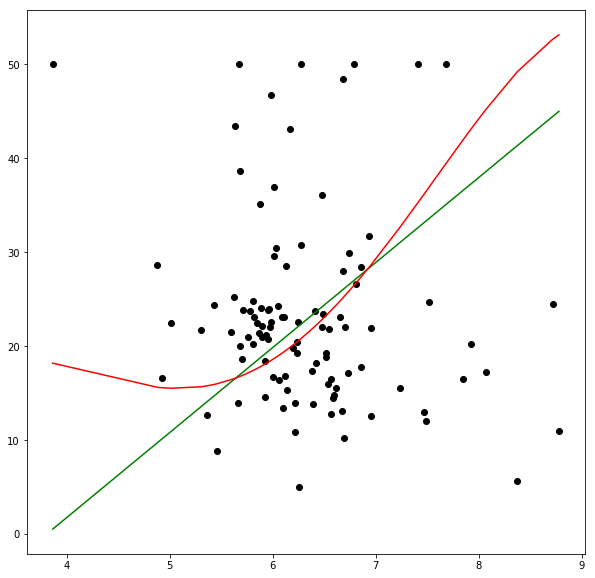

In [14]:
X_test_array = np.sort(X_test)
X_test_array.sort(axis = 0)

fig = plt.figure(figsize=(10,10))

plt.scatter(X_test_array, Y_test, color='black')
plt.plot(X_test_array, linear_1.predict(X_test_array), color='green')
plt.plot(X_test_array, linear_4.predict(poly_feat.transform(X_test_array)), color='red')

plt.show()

# Lasso Polynomial Regression

We will be using the Lasso polynomial regression model. Recall that Lasso regularisation (L1) has a regularisation weight that determines the weighting placed on regularisation. We use the following regularisation weights to evaluate which one is best for the regularisation weight in your constructed lasso polynomial regression.

alpha = 0.01 <br/>
alpha = 0.05 <br/>
alpha = 0.1 <br/>
alpha = 0.25 <br/>
alpha = 0.5 <br/>
alpha = 0.75 <br/>
alpha = 1 <br/>

Refer to the documentation about L1 regularisation to understand how to modify the polyminal regression model with the alpha parameter: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

**Your task now is to build seven different Lasso polynomial regression models with the above alpha parameters and evaluate which one works best (based on MSE). Keep the order of polynomial the same (i.e., 4). What is the alpha parameter that leads to the best model?**

# K-Fold Cross Validation

We will now use k-fold cross validation to evaluate parameters and to perform testing performance. Consider the following code to setup 5-fold cross validation:

In [15]:
from sklearn.model_selection import KFold

kFold = KFold(n_splits=5, shuffle=True)

The shuffle parameter of `KFold()` randomly shuffles the data before performing the splits. You may want to do some extra reading to understand how to use `KFold()`. In order to do model selection with different regularisation alpha values through k-fold cross validation, we first store the alpha values in a list:

In [16]:
lRegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

The following code first splits the data into a train and testing set via `kFold.split()`. Then it splits the training data into a training and validation set, and we use these two sets to train a series of lasso polynomial regression models with regularisation weight parameter in `lRegPara`. This is evaluated using MSE, and finally the code below prints out the results across each fold.

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
[39.8717490093706, 40.02847515304332, 40.89150255391931, 47.77448126876611, 60.9748995008383, 60.9748995008383, 60.9748995008383]


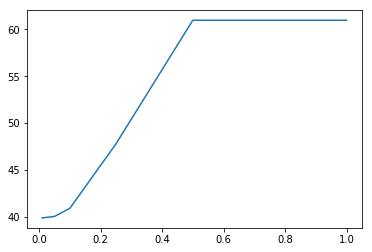

In [27]:
from sklearn.linear_model import Lasso

poly_feat = PolynomialFeatures(degree = 4)

i = 0
for trainIndex, testIndex in kFold.split(housing):
    # split the train test further
    trainX, validX, trainY, validY = train_test_split(np.array(X.loc[trainIndex]), np.array(Y.loc[trainIndex]), test_size=0.2, random_state = 191)

    # optimise the linear regression
    lResults = []

    for regPara in lRegPara:
        polyLassoReg = Lasso(alpha=regPara, normalize=True)
        polyFitTrainX = poly_feat.fit_transform(trainX)
        polyLassoReg.fit(polyFitTrainX, trainY)

        polyFitValidX = poly_feat.fit_transform(validX)
        predY = polyLassoReg.predict(polyFitValidX)
        mse = mean_squared_error(predY, validY)
        lResults.append(mse)

    i = i + 1
    print('Fold:', i)
    
print(lResults)
plt.plot(lRegPara, lResults)

**Modify the code above to output an average (and std. dev.) of the results and plot it. Use this result to help select the regularisation parameter setting. What is the alpha value that we should use for our Lasso polynomial model and why?**

> *ANSWER: alpha=0.01 should be used for Lasso 4 polynomial model because it yields lowest MSE*

In [31]:
print('Average:', np.mean(lResults))
print('STD:', np.std(lResults))

Average: 50.21298664108775
STD: 9.643340775941267


**Your next task is to adjust the order of polynomial to 2 and 3 and evaluate the results. Do these models perform better than the order 4 polynomial model?**

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
[42.893389688170856, 41.46801633236525, 40.8046336872548, 46.2700460829006, 64.81443387059899, 64.81443387059899, 64.81443387059899]


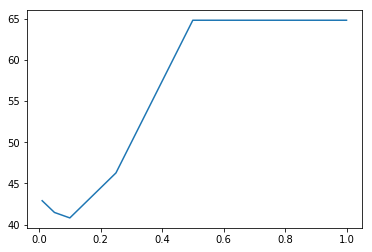

In [32]:
poly_feat = PolynomialFeatures(degree = 2)

i = 0
for trainIndex, testIndex in kFold.split(housing):
    # split the train test further
    trainX, validX, trainY, validY = train_test_split(np.array(X.loc[trainIndex]), np.array(Y.loc[trainIndex]), test_size=0.2, random_state = 191)

    # optimise the linear regression
    lResults = []

    for regPara in lRegPara:
        polyLassoReg = Lasso(alpha=regPara, normalize=True)
        polyFitTrainX = poly_feat.fit_transform(trainX)
        polyLassoReg.fit(polyFitTrainX, trainY)

        polyFitValidX = poly_feat.fit_transform(validX)
        predY = polyLassoReg.predict(polyFitValidX)
        mse = mean_squared_error(predY, validY)
        lResults.append(mse)

    i = i + 1
    print('Fold:', i)
    
print(lResults)
plt.plot(lRegPara, lResults)

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
[36.78124112442512, 37.46935839157451, 39.790438232480525, 56.493232801660405, 82.38777663465935, 82.38777663465935, 82.38777663465935]


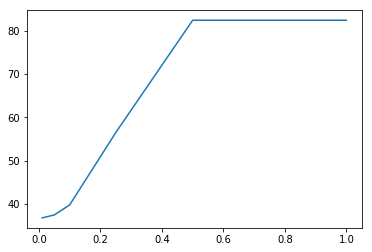

In [33]:
poly_feat = PolynomialFeatures(degree = 3)

i = 0
for trainIndex, testIndex in kFold.split(housing):
    # split the train test further
    trainX, validX, trainY, validY = train_test_split(np.array(X.loc[trainIndex]), np.array(Y.loc[trainIndex]), test_size=0.2, random_state = 191)

    # optimise the linear regression
    lResults = []

    for regPara in lRegPara:
        polyLassoReg = Lasso(alpha=regPara, normalize=True)
        polyFitTrainX = poly_feat.fit_transform(trainX)
        polyLassoReg.fit(polyFitTrainX, trainY)

        polyFitValidX = poly_feat.fit_transform(validX)
        predY = polyLassoReg.predict(polyFitValidX)
        mse = mean_squared_error(predY, validY)
        lResults.append(mse)

    i = i + 1
    print('Fold:', i)
    
print(lResults)
plt.plot(lRegPara, lResults)

>*ANSWER: 2 polynomial model performs worse than 4 polynomial, while 3 polynomial is better. Overall, 3 polynomial Lasso with alpha=0.01 is the best model*